In [272]:
# Dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [273]:
# Set filepath for file to analyze
# NOTE: Edit this for each new file being run
zillow_csv_path = Path('Zillow_Data/Metro_zori_uc_sfrcondomfr_sm_month.csv')
zillow_metric_name = 'Rent Index'

#Set specific start year
start_year = 2018
end_year = 2023

In [274]:
# --- Create a data frame containing the data from the CSV ---
# Load the CSV
zillow_df = pd.read_csv(zillow_csv_path)
# Insert 'US' as the state name for the United States region, so it shows up in state summary
zillow_df.at[0,"StateName"] = 'US'
# Rename labels
zillow_df.rename(columns={'SizeRank': 'Size Rank', 'RegionName': 'Metro Area', 'StateName': 'State' }, inplace=True)
# Remove the RegionType column
zillow_df = zillow_df.drop('RegionType', axis = 1)
# Insert a new blank column to store the Size Segment
zillow_df['Size Segment'] = pd.NA
# Re-order columns so that Size Segment is next to Size Rank
columns = zillow_df.columns.tolist()
columns.remove('Size Segment')
columns.insert(2, 'Size Segment')
zillow_df = zillow_df[columns]
# Establish Size Segments as bins
size_segment_bins = [-1, 0, 100, 200, 300, 400, 500, 1000]
size_segment_labels = ["National Average", "Top 100", "101 - 200", "201 - 300", "301 - 400", "401 - 500", "Bottom 500"]
# Insert segment values into Size Segment column
zillow_df['Size Segment'] = pd.cut(zillow_df["Size Rank"], bins=size_segment_bins, labels=size_segment_labels)
# Select only the columns with date information and the 'Size Segment' column
date_columns = [col for col in zillow_df.columns if isinstance(col, str) and col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023')]
columns_of_interest = ['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State'] + date_columns
zillow_df= zillow_df[columns_of_interest]

# Create a unique data frame which is named after the metric currently being analyzed:
# Set the df name as a string equal to the zillow metric name, with spaces replaced with underscores and in all lowercase
zillow_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df"
globals()[zillow_unique_df_name] = zillow_df.copy()
print(f'Created new dataframe: {zillow_unique_df_name}')
# Print the first few rows of the DataFrame
zillow_df.head()


Created new dataframe: rent_index_df


,RegionID,Size Rank,Size Segment,Metro Area,State,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,National Average,United States,US,1418.047212,1425.777880,1435.772212,1445.782747,1454.417816,...,1950.751556,1961.890364,1974.673562,1984.265275,1994.687917,2001.769101,2005.728434,2004.533106,2000.353386,1997.393964
1,394913,1,Top 100,"New York, NY",NY,2586.166378,2593.334064,2606.430672,2626.708809,2646.211639,...,3237.142166,3272.238639,3311.889239,3345.830240,3371.347908,3381.816711,3381.793473,3365.593176,3341.656750,3322.333169
2,753899,2,Top 100,"Los Angeles, CA",CA,2202.638894,2213.407058,2225.645108,2234.969689,2243.811229,...,2863.471055,2877.164759,2887.589775,2897.650240,2911.682800,2925.806514,2929.966694,2927.456029,2913.000620,2903.956011
3,394463,3,Top 100,"Chicago, IL",IL,1574.997031,1586.821184,1600.513802,1612.094927,1622.380184,...,1957.513365,1975.537705,1997.947939,2017.174938,2029.888803,2036.731897,2035.475260,2028.844172,2021.458598,2023.773775
4,394514,4,Top 100,"Dallas, TX",TX,1315.152944,1321.337172,1329.485377,1336.992426,1342.281836,...,1800.214251,1804.819750,1812.805517,1818.777908,1828.069758,1831.215568,1829.253585,1821.775857,1815.148720,1806.477735


In [275]:
# --- Create a data frame segmented by state ---
# Create a data frame that summarizes the data by size segment
state_summary_df = zillow_df.groupby('State').mean('State').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'State': 'Date'}, inplace = True)
state_summary_df.set_index('Date', inplace=True)
state_summary_df = state_summary_df.T
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'index': 'Date'}, inplace=True)
state_summary_df['Date'] = pd.to_datetime(state_summary_df['Date'])
# Copy to uniquely named data frame
state_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_state"
globals()[state_unique_df_name] = state_summary_df.copy()
print(f'Created new dataframe: {state_unique_df_name}')
state_summary_df.head()

Created new dataframe: rent_index_df_state


Date,Date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,US,UT,VA,VT,WA,WI,WV,WY
0,2018-01-31,1258.453219,978.952593,894.734566,1080.039983,1765.908282,1351.867865,1306.635974,1198.115186,1298.495889,...,1011.781836,1060.369869,1418.047212,1363.629766,1164.800694,1369.139562,1243.835365,951.115357,986.645294,909.924481
1,2018-02-28,1263.729122,981.815666,898.173588,1133.426924,1776.791726,1365.970146,1321.943901,1202.305814,1304.683382,...,1018.813293,1065.143452,1425.777880,1377.451209,1169.848477,1386.292069,1254.511733,955.871423,860.329309,906.439229
2,2018-03-31,1271.414870,986.908245,901.173868,1149.821140,1786.508954,1381.742324,1332.949805,1205.509717,1307.254568,...,1024.060872,1069.813306,1435.772212,1394.089238,1147.670842,1407.147411,1269.167648,959.484959,862.602622,909.202288
3,2018-04-30,1281.248264,991.465131,903.669642,1172.006117,1801.136942,1393.595956,1340.305173,1211.207208,1313.563978,...,1029.341787,1075.647465,1445.782747,1397.197127,1160.427669,1415.408380,1284.752961,962.345166,869.156835,913.924369
4,2018-05-31,1292.619016,998.696040,907.132151,1181.632182,1810.549739,1399.819381,1341.230690,1215.681775,1320.869006,...,1036.508734,1082.109780,1454.417816,1408.207426,1164.294260,1405.022334,1314.993853,963.880521,868.663364,924.447397


In [276]:
# --- Create a data frame segmented by size rank ---
# Group by 'Size Segment' and calculate the mean for each segment
zillow_df_mean = zillow_df.groupby('Size Segment', observed = False).mean('Size Segment').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
# Reset the index for better display
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'Size Segment': 'Date'}, inplace = True)
zillow_df_mean.set_index('Date', inplace=True)
zillow_df_mean = zillow_df_mean.T
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'index': 'Date'}, inplace=True)
zillow_df_mean['Date'] = pd.to_datetime(zillow_df_mean['Date'])
# Create uniquely named data frame
size_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_size"
globals()[size_unique_df_name] = zillow_df_mean.copy()
print(f'Created new dataframe: {size_unique_df_name }')
zillow_df_mean.head()


Created new dataframe: rent_index_df_size


Date,Date,National Average,Top 100,101 - 200,201 - 300,301 - 400,401 - 500,Bottom 500
0,2018-01-31,1418.047212,1275.944314,1082.949483,1033.739766,977.123005,1245.783539,808.198016
1,2018-02-28,1425.777880,1283.686996,1083.934216,1038.580914,996.585375,1252.288739,815.147310
2,2018-03-31,1435.772212,1292.168972,1091.093620,1048.480281,995.833017,1264.287591,816.026444
3,2018-04-30,1445.782747,1300.889258,1098.689434,1056.582271,988.859565,1272.047238,822.025118
4,2018-05-31,1454.417816,1307.751871,1105.173723,1062.977973,996.506669,1264.964306,823.404278


In [277]:
interest_rates_csv_path = Path('Zillow_Data/fed-funds-rate-historical-chart-modified.csv')
interest_rates_df = pd.read_csv(interest_rates_csv_path)
interest_rates_df['Date'] = pd.to_datetime(interest_rates_df['Date'])
interest_rates_df

,Date,Federal Funds Rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
24914,2024-08-24,NaN
24915,2024-08-25,NaN
24916,2024-08-26,NaN
24917,2024-08-27,NaN


In [278]:
rent_index_vs_interest_rate_df = pd.merge(rent_index_df_size, interest_rates_df, on="Date", how='inner')
rent_index_vs_interest_rate_df

,Date,National Average,Top 100,101 - 200,201 - 300,301 - 400,401 - 500,Bottom 500,Federal Funds Rate
0,2018-01-31,1418.047212,1275.944314,1082.949483,1033.739766,977.123005,1245.783539,808.198016,1.34
1,2018-02-28,1425.777880,1283.686996,1083.934216,1038.580914,996.585375,1252.288739,815.147310,1.35
2,2018-03-31,1435.772212,1292.168972,1091.093620,1048.480281,995.833017,1264.287591,816.026444,1.67
3,2018-04-30,1445.782747,1300.889258,1098.689434,1056.582271,988.859565,1272.047238,822.025118,1.69
4,2018-05-31,1454.417816,1307.751871,1105.173723,1062.977973,996.506669,1264.964306,823.404278,1.70
5,2018-07-31,1467.965209,1318.451522,1113.967400,1075.046198,1003.289468,1272.731498,826.617262,1.91
6,2018-08-31,1471.379792,1321.497379,1115.460927,1080.651671,1006.362055,1271.941096,830.181292,1.91
7,2018-10-31,1470.153754,1321.230571,1117.924612,1084.605257,1007.608336,1275.516618,828.523587,2.20
8,2018-11-30,1470.848444,1322.395224,1119.612457,1083.972454,1008.165609,1279.780995,826.286670,2.20
9,2018-12-31,1473.159933,1324.756327,1121.703257,1085.112388,1010.023047,1286.164285,828.673986,2.40


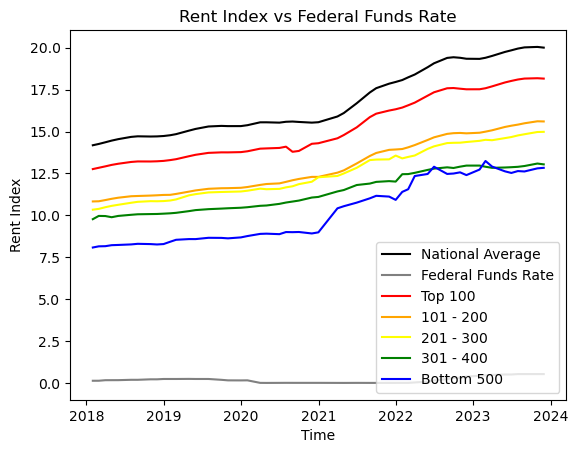

In [300]:
# Plot inventory data against interest rates
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['National Average'] / 100, label = "National Average", color = "black")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['Federal Funds Rate'] / 10, label = "Federal Funds Rate", color = "grey")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['Top 100'] / 100, label = "Top 100", color = "red")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['101 - 200'] / 100, label = "101 - 200", color = "orange")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['201 - 300'] / 100, label = "201 - 300", color = "yellow")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['301 - 400'] / 100, label = "301 - 400", color = "green")
plt.plot(rent_index_vs_interest_rate_df['Date'], rent_index_vs_interest_rate_df['Bottom 500'] / 100, label = "Bottom 500", color = "blue")

plt.title('Rent Index vs Federal Funds Rate')
plt.xlabel("Time")
plt.ylabel('Rent Index')
plt.legend()
plt.show()


In [280]:
#Calculate the correlation between Rent Index and Fed Funds Rate
corr_rent_index_interest_rates = rent_index_vs_interest_rate_df['National Average'].corr(rent_index_vs_interest_rate_df['Federal Funds Rate'])
corr_rent_index_interest_rates

0.5389468407966478

In [281]:
#Calculate the correlation for prepandemic years (2018-2019)
start_date = '2018-01-01'
end_date = '2019-12-31'
rent_index_vs_interest_rate_df_prepandemic = rent_index_vs_interest_rate_df[(rent_index_vs_interest_rate_df['Date'] >= start_date) & (rent_index_vs_interest_rate_df['Date'] <= end_date)]
corr_rent_index_vs_interest_rate_df_prepandemic = rent_index_vs_interest_rate_df_prepandemic['National Average'].corr(rent_index_vs_interest_rate_df_prepandemic['Federal Funds Rate'])
corr_rent_index_vs_interest_rate_df_prepandemic

0.40059713855720935

In [282]:
#Calculate the correlation for pandemic years (2020-2021)
start_date = '2020-01-01'
end_date = '2021-12-31'
rent_index_vs_interest_rate_df_pandemic = rent_index_vs_interest_rate_df[(rent_index_vs_interest_rate_df['Date'] >= start_date) & (rent_index_vs_interest_rate_df['Date'] <= end_date)]
corr_rent_index_vs_interest_rate_df_pandemic = rent_index_vs_interest_rate_df_pandemic['National Average'].corr(rent_index_vs_interest_rate_df_pandemic['Federal Funds Rate'])
corr_rent_index_vs_interest_rate_df_pandemic

-0.24996527113609282

In [283]:
#Caculate the correlation for post-pandemic years (2022-2023)
start_date = '2022-01-01'
end_date = '2023-12-31'
rent_index_vs_interest_rate_df_post_pandemic = rent_index_vs_interest_rate_df[(rent_index_vs_interest_rate_df['Date'] >= start_date) & (rent_index_vs_interest_rate_df['Date'] <= end_date)]
corr_rent_index_vs_interest_rate_df_post_pandemic = rent_index_vs_interest_rate_df_post_pandemic['National Average'].corr(rent_index_vs_interest_rate_df_post_pandemic['Federal Funds Rate'])
corr_rent_index_vs_interest_rate_df_post_pandemic


0.941438394364545

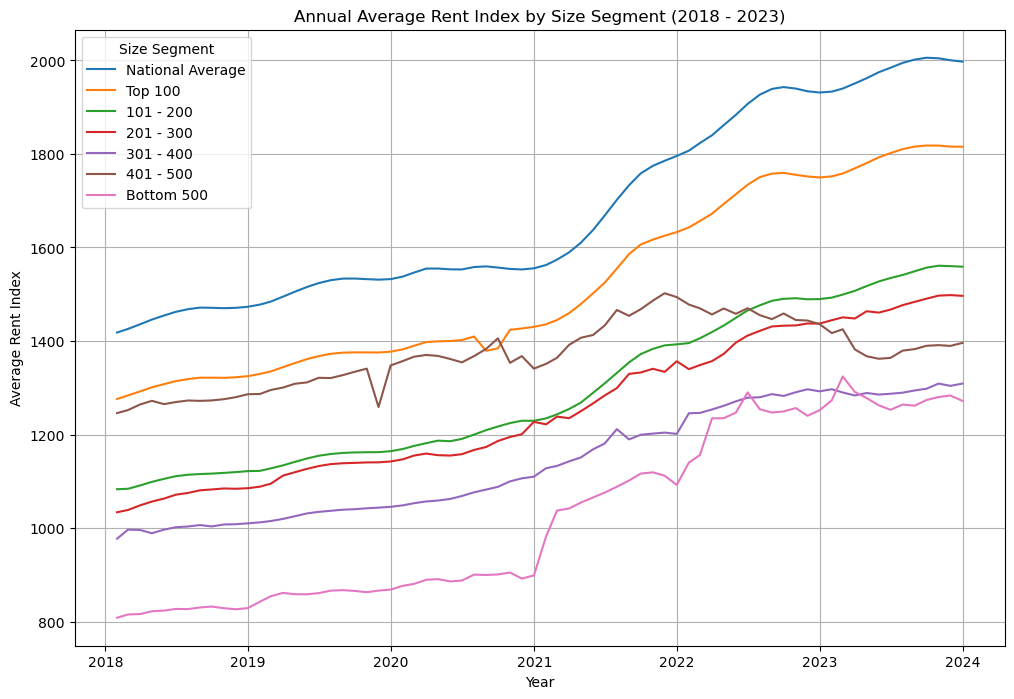

In [284]:
#Plot the rent index by size rank per year 
plt.figure(figsize=(12,8))
for col in rent_index_df_size.columns[1:]:
    plt.plot(rent_index_df_size['Date'], rent_index_df_size[col], label=col)

plt.title('Annual Average Rent Index by Size Segment (2018 - 2023)')
plt.xlabel('Year')
plt.ylabel('Average Rent Index')
plt.legend(title='Size Segment')
plt.grid(True)
plt.show()

In [285]:
import scipy.stats as stats
#Filter the data for the pandemic period (2020-2021)
pandemic_data = rent_index_df_size[rent_index_df_size['Date'].between('2020-01-01', '2021-12-31')]
#Calculate the monthly percentage change in rent value index for each segment
pandemic_data.set_index('Date', inplace=True)
monthly_changes = pandemic_data.pct_change().dropna()
#Group the monthly changes into Large and Small city segments
large_city_changes = monthly_changes['Top 100'].dropna()
small_city_changes = monthly_changes[['201 - 300', '301 - 400', '401 - 500', 'Bottom 500']].mean(axis=1).dropna()
#Run the ANOVA test with these multiple data points
anova_result = stats.f_oneway(large_city_changes, small_city_changes)

print("ANOVA Result:", anova_result)

ANOVA Result: F_onewayResult(statistic=0.03126409047115125, pvalue=0.86046389110694)


In [288]:
# Calculate summary statistics for large city changes
large_city_summary = large_city_changes.describe()
large_city_mode = large_city_changes.mode()

print("\nSummary Statistics for Large City Rent Index:")
print(large_city_summary)
print("Mode:", large_city_mode.values)

# Calculate summary statistics for small city changes
small_city_summary = small_city_changes.describe()
small_city_mode = small_city_changes.mode()

print("\nSummary Statistics for Small City Rent Index:")
print(small_city_summary)
print("Mode:", small_city_mode.values)


Summary Statistics for Large City Rent Index:
count    23.000000
mean      0.007316
std       0.009623
min      -0.021664
25%       0.003048
50%       0.005602
75%       0.013146
max       0.028759
Name: Top 100, dtype: float64
Mode: [-0.02166392  0.00048459  0.00111517  0.00149684  0.00195928  0.00236916
  0.00372737  0.0038913   0.00471704  0.0051176   0.00537268  0.00560195
  0.00562326  0.00632839  0.00650033  0.01023526  0.01297256  0.01331939
  0.01527438  0.01543043  0.01969879  0.01992573  0.02875902]

Summary Statistics for Small City Rent Index:
count    23.000000
mean      0.006861
std       0.007717
min      -0.003643
25%       0.001519
50%       0.005695
75%       0.010193
max       0.028008
dtype: float64
Mode: [-0.00364319 -0.00213961 -0.00189522 -0.00029785  0.0002667   0.00129024
  0.00174716  0.00218834  0.00333852  0.0049592   0.00535593  0.00569464
  0.00578781  0.00769405  0.00844297  0.00851697  0.00983033  0.01055567
  0.01072287  0.01215337  0.01822948  0.02099

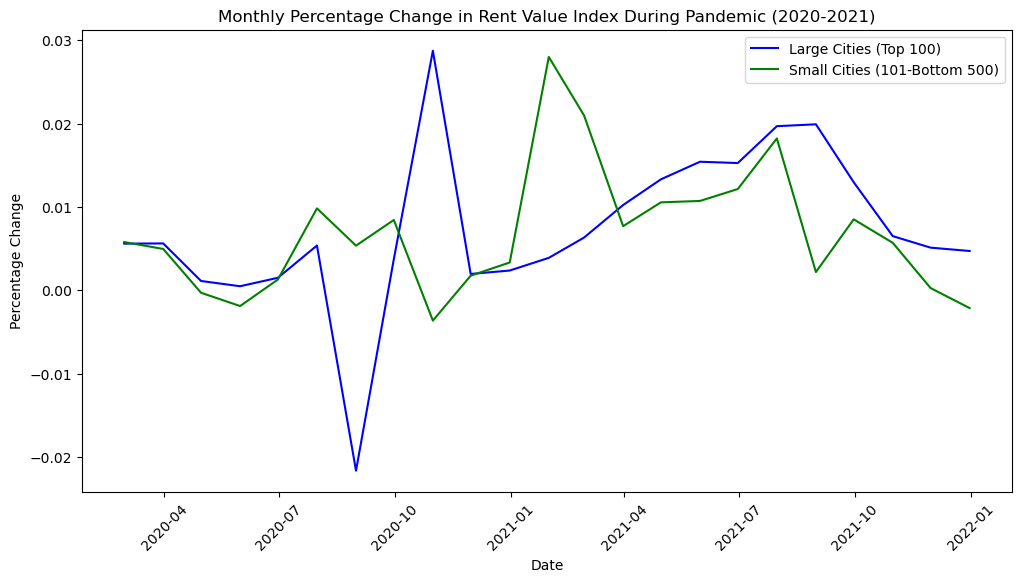

In [287]:
#Create a line plot
plt.figure(figsize=(12, 6))

# Plot large city changes
plt.plot(large_city_changes.index, large_city_changes, label='Large Cities (Top 100)', color='blue')

# Plot small city changes (average of segments)
plt.plot(small_city_changes.index, small_city_changes, label='Small Cities (101-Bottom 500)', color='green')

# Add title and labels
plt.title('Monthly Percentage Change in Rent Value Index During Pandemic (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
# Add legend
plt.legend()
# Display the plot
plt.show()